# Least Squared Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sympy import Matrix
from IPython.display import display, Math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [2]:
def prec_mat(y,yhat):
    
    y_true = len(y[y==1])
    y_false = len(y[y==-1])
    
    yhat_true = len(yhat[yhat==1])
    yhat_false = len(yhat[yhat==-1])
    
    error = y - yhat
    
    inc_true = len(error[error==2])
    inc_false = len(error[error==-2])
    
    cor_true = y_true - inc_true
    cor_false = y_false - inc_false
    
    y_mat = np.array([[cor_true/y_true,inc_false/y_false],[inc_true/y_true,cor_false/y_false]])
  
    return y_mat
    

def error_frac(X_train,y_train,X_eval,y_eval):
    
    w = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
    y_hat = np.sign(X_eval@w)
    error = np.count_nonzero(y_eval-y_hat)/len(y_eval)
    
    return error

def cross_val(X,y,splits):

    error = np.zeros(splits)

    X_splits = np.array_split(X,splits)
    y_splits = np.array_split(y,splits)

    for j in range(splits):
        X_eval_split = X_splits[j]
        y_eval_split = y_splits[j]
        X_train_split = np.concatenate(np.delete(X_splits,j,0))
        y_train_split = np.concatenate(np.delete(y_splits,j,0))
        error[j] = error_frac(X_train_split,y_train_split,X_eval_split,y_eval_split)

    avg_error = np.mean(error)
    
    return avg_error

splits = 10

## Load and Process Data

In [3]:
data = pd.read_csv('nasa_train.csv')

### Scale and Randomize Features

In [4]:
y = data.Hazardous.values.reshape(-1,1)
X = data.drop(['Hazardous'],axis=1).values
X = scaled.fit_transform(X)

In [5]:
data

Absolute Magnitude  Est Dia in KM(max)  Relative Velocity km per sec  \
0                   21.6            0.284472                      6.115834   
1                   21.3            0.326618                     18.113985   
2                   20.3            0.517654                      7.590711   
3                   27.4            0.019681                     11.173874   
4                   21.6            0.284472                      9.840831   
...                  ...                 ...                           ...   
4213                26.3            0.032662                     17.278498   
4214                20.7            0.430566                     26.016058   
4215                23.9            0.098637                     22.154265   
4216                22.7            0.171412                      7.191642   
4217                21.8            0.259442                     11.352090   

      Miss Dist.(kilometers)  Orbit Uncertainity  Minimum Orbit Intersection  \
0                 62753692.0                   5                    0.025282   
1                 57298148.0                   3                    0.186935   
2                  7622911.5                   0                    0.043058   
3                 42683616.0                   6                    0.005512   
4                 61010824.0                   1                    0.034798   
...                      ...                 ...                         ...   
4213              58247436.0                   8                    0.040471   
4214              25067180.0                   1                    0.121499   
4215               6187511.0                   8                    0.019777   
4216               9126775.0                   6                    0.059973   
4217              39009084.0                   5                    0.177510   

      Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  \
0                           4.634         2458000.5      0.425549   
1                           5.457         2458000.5      0.351674   
2                           4.557         2458000.5      0.348248   
3                           5.093         2458000.5      0.216578   
4                           5.154         2458000.5      0.210448   
...                           ...               ...           ...   
4213                        6.696         2454418.5      0.225074   
4214                        3.843         2458000.5      0.652899   
4215                        5.156         2457637.5      0.361512   
4216                        4.410         2458000.5      0.368055   
4217                        4.477         2458000.5      0.202565   

      Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
0            1.407011     6.025981          314.373913      609.599786   
1            1.107776    28.412996          136.717242      425.869294   
2            1.458824     4.237961          259.475979      643.580228   
3            1.255903     7.905894           57.173266      514.082140   
4            1.225615    16.793382           84.629307      495.597821   
...               ...          ...                 ...             ...   
4213         0.881848     7.243616           43.263028      302.474700   
4214         1.706178    23.893424          145.035928      814.019755   
4215         1.161429    39.880491          164.183305      457.179984   
4216         1.528234     4.405467           37.026468      690.054279   
4217         1.486600    21.080244          163.802910      662.048343   

      Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  \
0                0.808259       57.257470       2.005764     2.458162e+06   
1                0.718200      313.091975       1.497352     2.457795e+06   
2                0.950791      248.415038       1.966857     2.458120e+06   
3                0.983902       18.707701       1.527904     2.457902e+06   
4    

## All Feature Least Squared

### Without Cross Validation

In [6]:
w = np.linalg.inv(X.T@X)@X.T@y
display(Matrix(np.round(w,3)))

Matrix([
[ -3.044],
[ -4.312],
[ -0.106],
[  0.123],
[ -0.336],
[  -2.46],
[ -5.274],
[  0.337],
[  0.563],
[-72.592],
[ -0.201],
[  0.011],
[   6.89],
[  9.596],
[   0.02],
[   59.0],
[ -0.525],
[  0.043],
[  3.954]])

In [7]:
yhat = np.sign(X@w)
err = y - yhat
error = np.count_nonzero(err)/len(err)
print('The error using all features without cross validation is',np.round(error*100,2),'%')
conf_mat = prec_mat(y,yhat)
display(Matrix(np.round(conf_mat*100,1)))

The error using all features without cross validation is 9.2 %


Matrix([
[49.2,  1.2],
[50.8, 98.8]])

Based on the confusion matrix, it can be seen the model is able to accurately predict that an asteroid is not hazardous but cannot accurately predict that an asteroid is hazardous. 

### With Cross Validation

In [8]:
avg_error = cross_val(X,y,splits)

print('The expected error of the all feature model is', np.round(avg_error*100,2), '%')

The expected error of the all feature model is 9.46 %


## Feature Selection with Least Sqaured

### Visualization

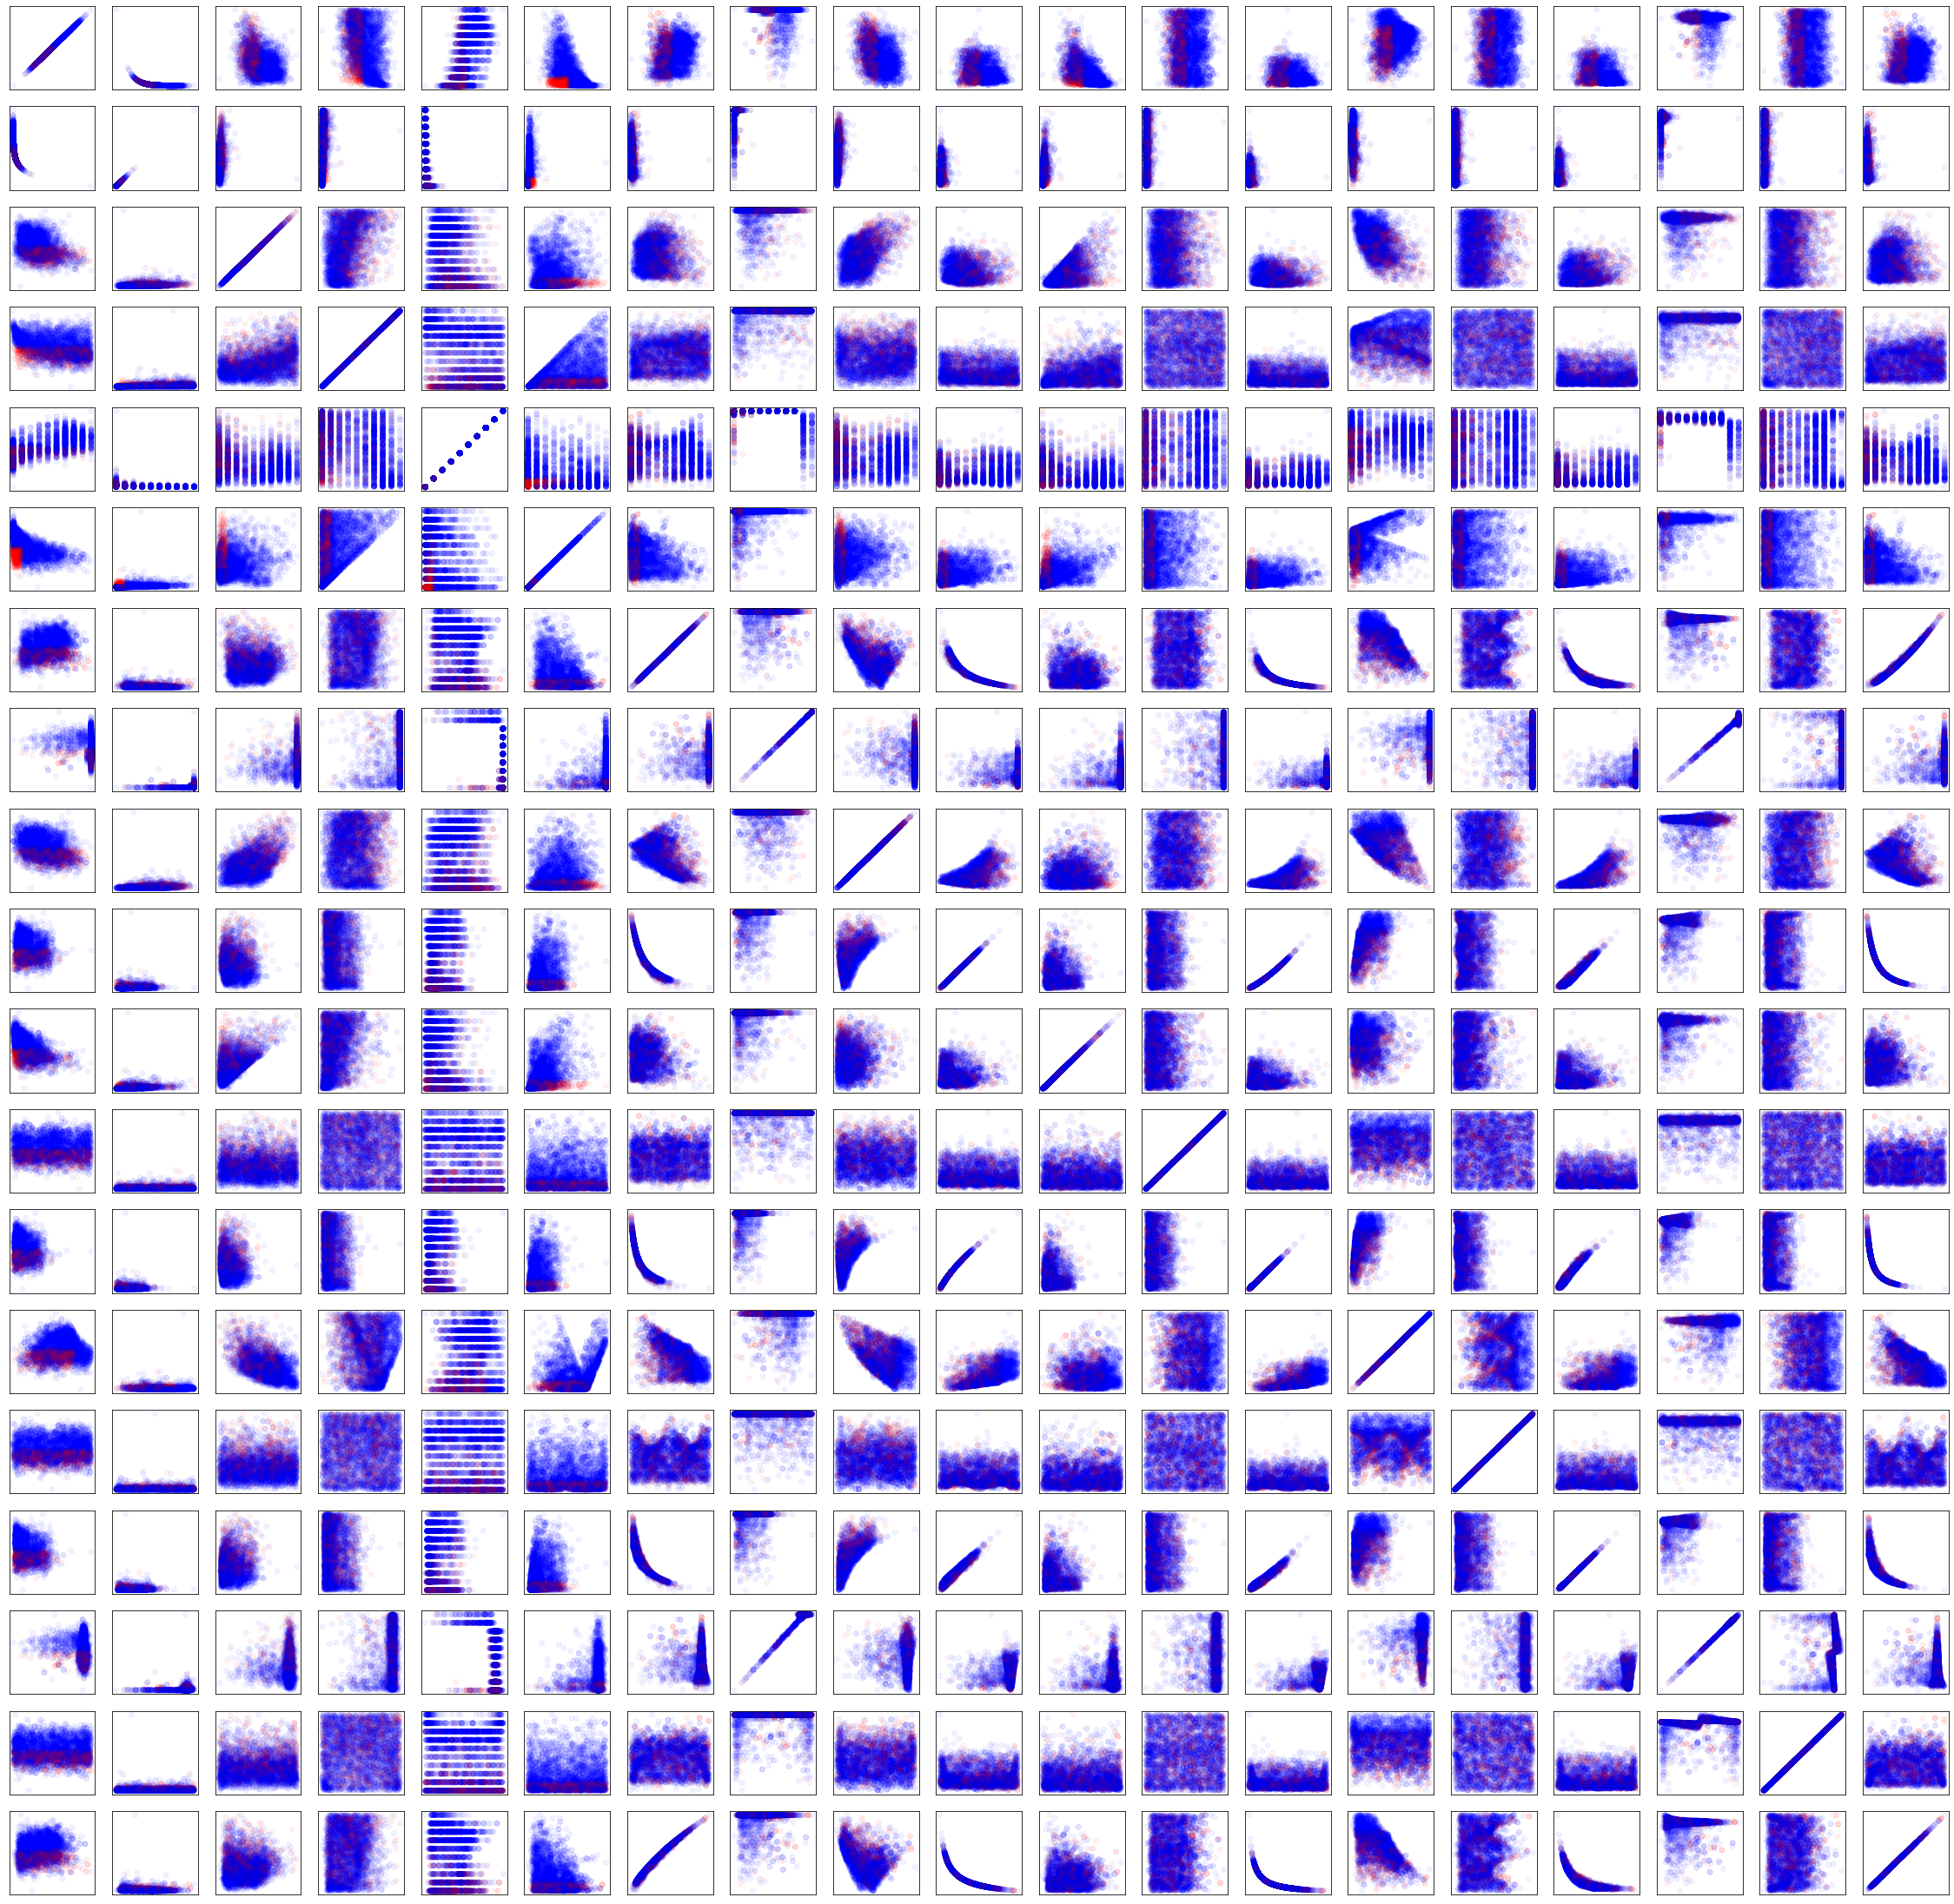

In [9]:
fig = plt.figure(figsize=(40,40))

k = 1

ycolors = ['r' if value > 0 else 'b' for value in y]

for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        fig.add_subplot(X.shape[1],X.shape[1], k)
        plt.scatter(X[:,i],X[:,j],color=ycolors, marker='o', alpha=0.05)
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        k = k + 1

### Initial Guess

Two sets of interactions pictured above really stand out for their strong sorting

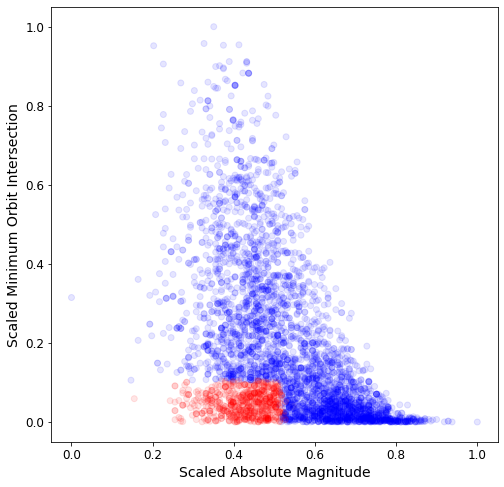

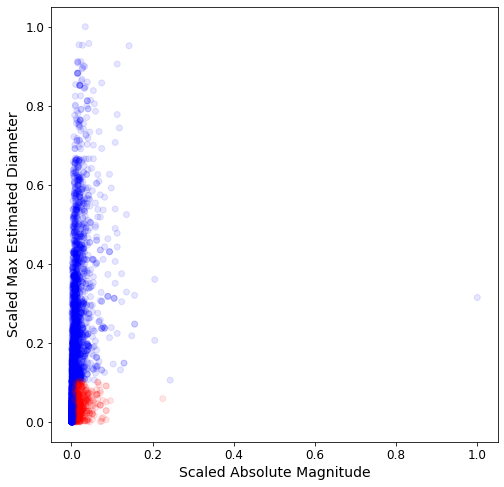

In [10]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
ycolors = ['r' if value > 0 else 'b' for value in y]
plt.scatter(X[:,0],X[:,5],color=ycolors, marker='o', alpha=0.1)
plt.xlabel('Scaled Absolute Magnitude',fontsize=14)
plt.ylabel('Scaled Minimum Orbit Intersection',fontsize=14)
plt.show()

plt.figure(figsize=(8,8))
plt.rc('font', size=12)
ycolors = ['r' if value > 0 else 'b' for value in y]
plt.scatter(X[:,1],X[:,5],color=ycolors, marker='o', alpha=0.1)
plt.xlabel('Scaled Absolute Magnitude',fontsize=14)
plt.ylabel('Scaled Max Estimated Diameter',fontsize=14)
plt.show()

A model will be built off of these three features

In [11]:
delete_feat = np.delete(np.arange(X.shape[1]),[0,5,1])
X_3 = np.delete(X,delete_feat,axis=1)

In [12]:
w_3 = np.linalg.inv(X_3.T@X_3)@X_3.T@y
display(Matrix(np.round(w_3,1)))

Matrix([
[-1.0],
[ 4.4],
[-1.4]])

In [13]:
avg_error = cross_val(X_3,y,splits) 

print('The expected error of this three feature model is', np.round(avg_error*100,2), '%')

The expected error of this three feature model is 16.19 %


In [14]:
yhat = np.sign(X_3@w_3)
conf_mat = prec_mat(y,yhat)
display(Matrix(np.round(conf_mat*100,1)))

Matrix([
[ 1.6,  0.3],
[98.4, 99.7]])

The confusion matrix shows these features classify nearly every point as nonhazardous. This error is a lot higher than the all feature model, so more a rigorous method will be used.

### Ranking Features

In [15]:
least_feat = np.zeros(X.shape[1],dtype=int)

X_del = copy.copy(X)

for k in range(X.shape[1]):

    avg_error = np.zeros(X_del.shape[1])
    
    for i in range(X_del.shape[1]):

        X_del_1 = np.delete(X_del,i,axis=1)

        avg_error[i] = cross_val(X_del_1,y,splits)

    least_feat[k] = np.argmin(avg_error)
    
    X_del = np.delete(X_del,least_feat[k],axis=1)

least_feat = least_feat.tolist()

least_feat_sort = np.zeros(len(least_feat),dtype=int)
least_feat_sort = least_feat_sort.tolist()

least_feat_sort[0] = least_feat[0]  

all_int = list(range(0, X.shape[1]))

all_int.remove(least_feat_sort[0])
    
for i in range(1,len(least_feat)):
    
    least_feat_sort[i] = all_int[least_feat[i]]
    all_int.pop(least_feat[i])
    
best_feat = np.flip(np.array(least_feat_sort))
print('Ranked Features:', best_feat)

Ranked Features: [15  5 13  0  9  1  4  8  3  6 12 16 14 11 17  2 18  7 10]


In [16]:
avg_error = np.zeros(X.shape[1])

for i in range(len(best_feat)):
    
    delete_feat = np.delete(np.arange(X.shape[1]),best_feat[0:i+1])
    X_del = np.delete(X,delete_feat,axis=1)
        
    avg_error[i] = cross_val(X_del,y,splits)

best_comb = np.argmin(avg_error)

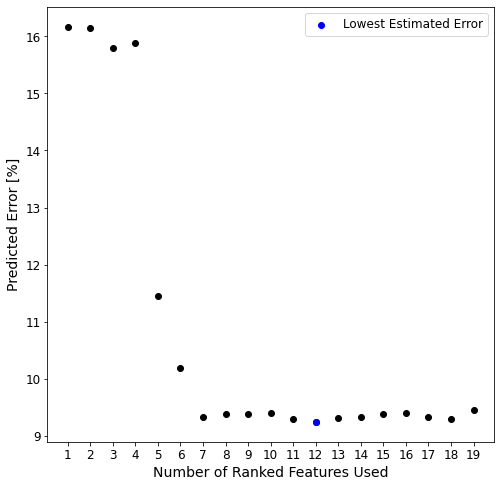

In [17]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(np.arange(0,19)+1,avg_error*100,color='k', marker='o', alpha=1)
plt.scatter(best_comb+1,avg_error[best_comb]*100,color='b', marker='o', alpha=1,label='Lowest Estimated Error')
plt.xlabel('Number of Ranked Features Used',fontsize=14)
plt.xticks(np.arange(0,19)+1)
plt.ylabel('Predicted Error [%]',fontsize=14)
plt.legend(fontsize=12)
plt.show()

Looking at the graph above, the lowest error occurs using the 12 most imporartant features.
However, using just 7 of the most important features provides a comparable error.

## Final Training

In [18]:
data.drop(['Relative Velocity km per sec','Miss Dist.(kilometers)','Jupiter Tisserand Invariant','Epoch Osculation',
           'Eccentricity','Inclination','Asc Node Longitude','Orbital Period','Perihelion Arg','Perihelion Time','Mean Anomaly',
           'Mean Motion'],axis=1,inplace=True)

In [19]:
scaled = MinMaxScaler()
y = data.Hazardous.values.reshape(-1,1)
X_final = data.drop(['Hazardous'],axis=1).values
X_final = scaled.fit_transform(X_final)

In [20]:
data

Absolute Magnitude  Est Dia in KM(max)  Orbit Uncertainity  \
0                   21.6            0.284472                   5   
1                   21.3            0.326618                   3   
2                   20.3            0.517654                   0   
3                   27.4            0.019681                   6   
4                   21.6            0.284472                   1   
...                  ...                 ...                 ...   
4213                26.3            0.032662                   8   
4214                20.7            0.430566                   1   
4215                23.9            0.098637                   8   
4216                22.7            0.171412                   6   
4217                21.8            0.259442                   5   

      Minimum Orbit Intersection  Semi Major Axis  Perihelion Distance  \
0                       0.025282         1.407011             0.808259   
1                       0.186935         1.107776             0.718200   
2                       0.043058         1.458824             0.950791   
3                       0.005512         1.255903             0.983902   
4                       0.034798         1.225615             0.967687   
...                          ...              ...                  ...   
4213                    0.040471         0.881848             0.683367   
4214                    0.121499         1.706178             0.592216   
4215                    0.019777         1.161429             0.741558   
4216                    0.059973         1.528234             0.965760   
4217                    0.177510         1.486600             1.185467   

      Aphelion Dist  Hazardous  
0          2.005764          1  
1          1.497352         -1  
2          1.966857          1  
3          1.527904         -1  
4          1.483543          1  
...             ...        ...  
4213       1.080329         -1  
4214       2.820140         -1  
4215       1.581299         -1  
4216       2.090708         -1  
4217       1.787733         -1  

[4218 rows x 8 columns]

In [21]:
w_final = np.linalg.inv(X_final.T@X_final)@X_final.T@y
display(Matrix(np.round(w_final,3)))

Matrix([
[ -3.163],
[ -4.342],
[ -0.322],
[ -2.347],
[-38.232],
[  5.303],
[ 35.445]])

In [22]:
error = np.count_nonzero(y - np.sign(X_final@w_final))/len(y)
print('The error using the 7 most important features without cross validation is',np.round(error*100,2),'%')

The error using the 7 most important features without cross validation is 9.34 %


In [23]:
expected_error = cross_val(X_final,y,splits)

print('The expected error of this 7 feature model is', np.round(expected_error*100,2), '%')

The expected error of this 7 feature model is 9.34 %


In [24]:
yhat = np.sign(X_final@w_final)
conf_mat = prec_mat(y,yhat)
display(Matrix(np.round(conf_mat*100,1)))

Matrix([
[47.9,  1.1],
[52.1, 98.9]])

While the overall expected error is relativly low, the error for one the hazardous class is much larger than the other. Based on the confusion matrix, it can be seen the model is able to accurately predict that an asteroid is not hazardous but cannot accurately predict that an asteroid is hazardous.

## Validation

### Remove one Feature

In [25]:
avg_error = np.zeros(X_final.shape[1])

for i in range(X_final.shape[1]):
    
    delete_feat = i
    X_del = np.delete(X_final,delete_feat,axis=1)
        
    avg_error[i] = cross_val(X_del,y,splits)

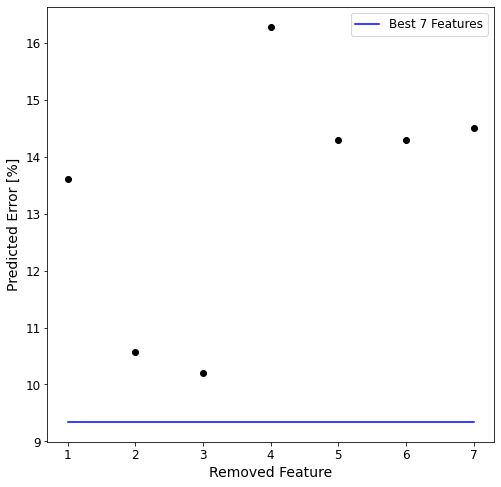

In [26]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(np.arange(X_final.shape[1])+1,avg_error*100,color='k', marker='o', alpha=1)
plt.plot([1,7],[expected_error*100,expected_error*100],color='b',label='Best 7 Features')
plt.xlabel('Removed Feature',fontsize=14)
plt.xticks(np.arange(7)+1)
plt.ylabel('Predicted Error [%]',fontsize=14)
plt.legend()
plt.show()

### Add one Feature

In [27]:
avg_error = []
ind = []

for i in range(X.shape[1]):
    
    if i not in best_feat[:7]:
    
        delete_feat = np.delete(np.arange(0,X.shape[1]),np.hstack((best_feat[:7],np.array([i],dtype=int))))
        X_final_add = np.delete(X,delete_feat,axis=1)
        avg_error.append( cross_val(X_final_add,y,splits) )
        ind.append(i)

avg_error = np.array(avg_error)
ind = np.array(ind)

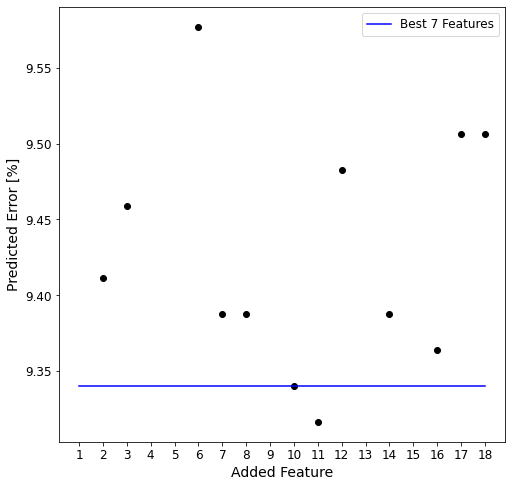

In [28]:
plt.figure(figsize=(8,8))
plt.rc('font', size=12)
plt.scatter(ind,avg_error*100,color='k', marker='o', alpha=1)
plt.plot([1,18],[expected_error*100,expected_error*100],color='b',label='Best 7 Features')
plt.xlabel('Added Feature',fontsize=14)
plt.xticks(np.arange(18)+1)
plt.ylabel('Predicted Error [%]',fontsize=14)
plt.legend()
plt.show()

It can be observed adding any feature to the dataset does not significantly reduce the predicted error. In most cases, adding the feature even increases the expected error. This is consistent with out graph of ranked features and validates the selection of the features.

## Visualization of Chosen Features

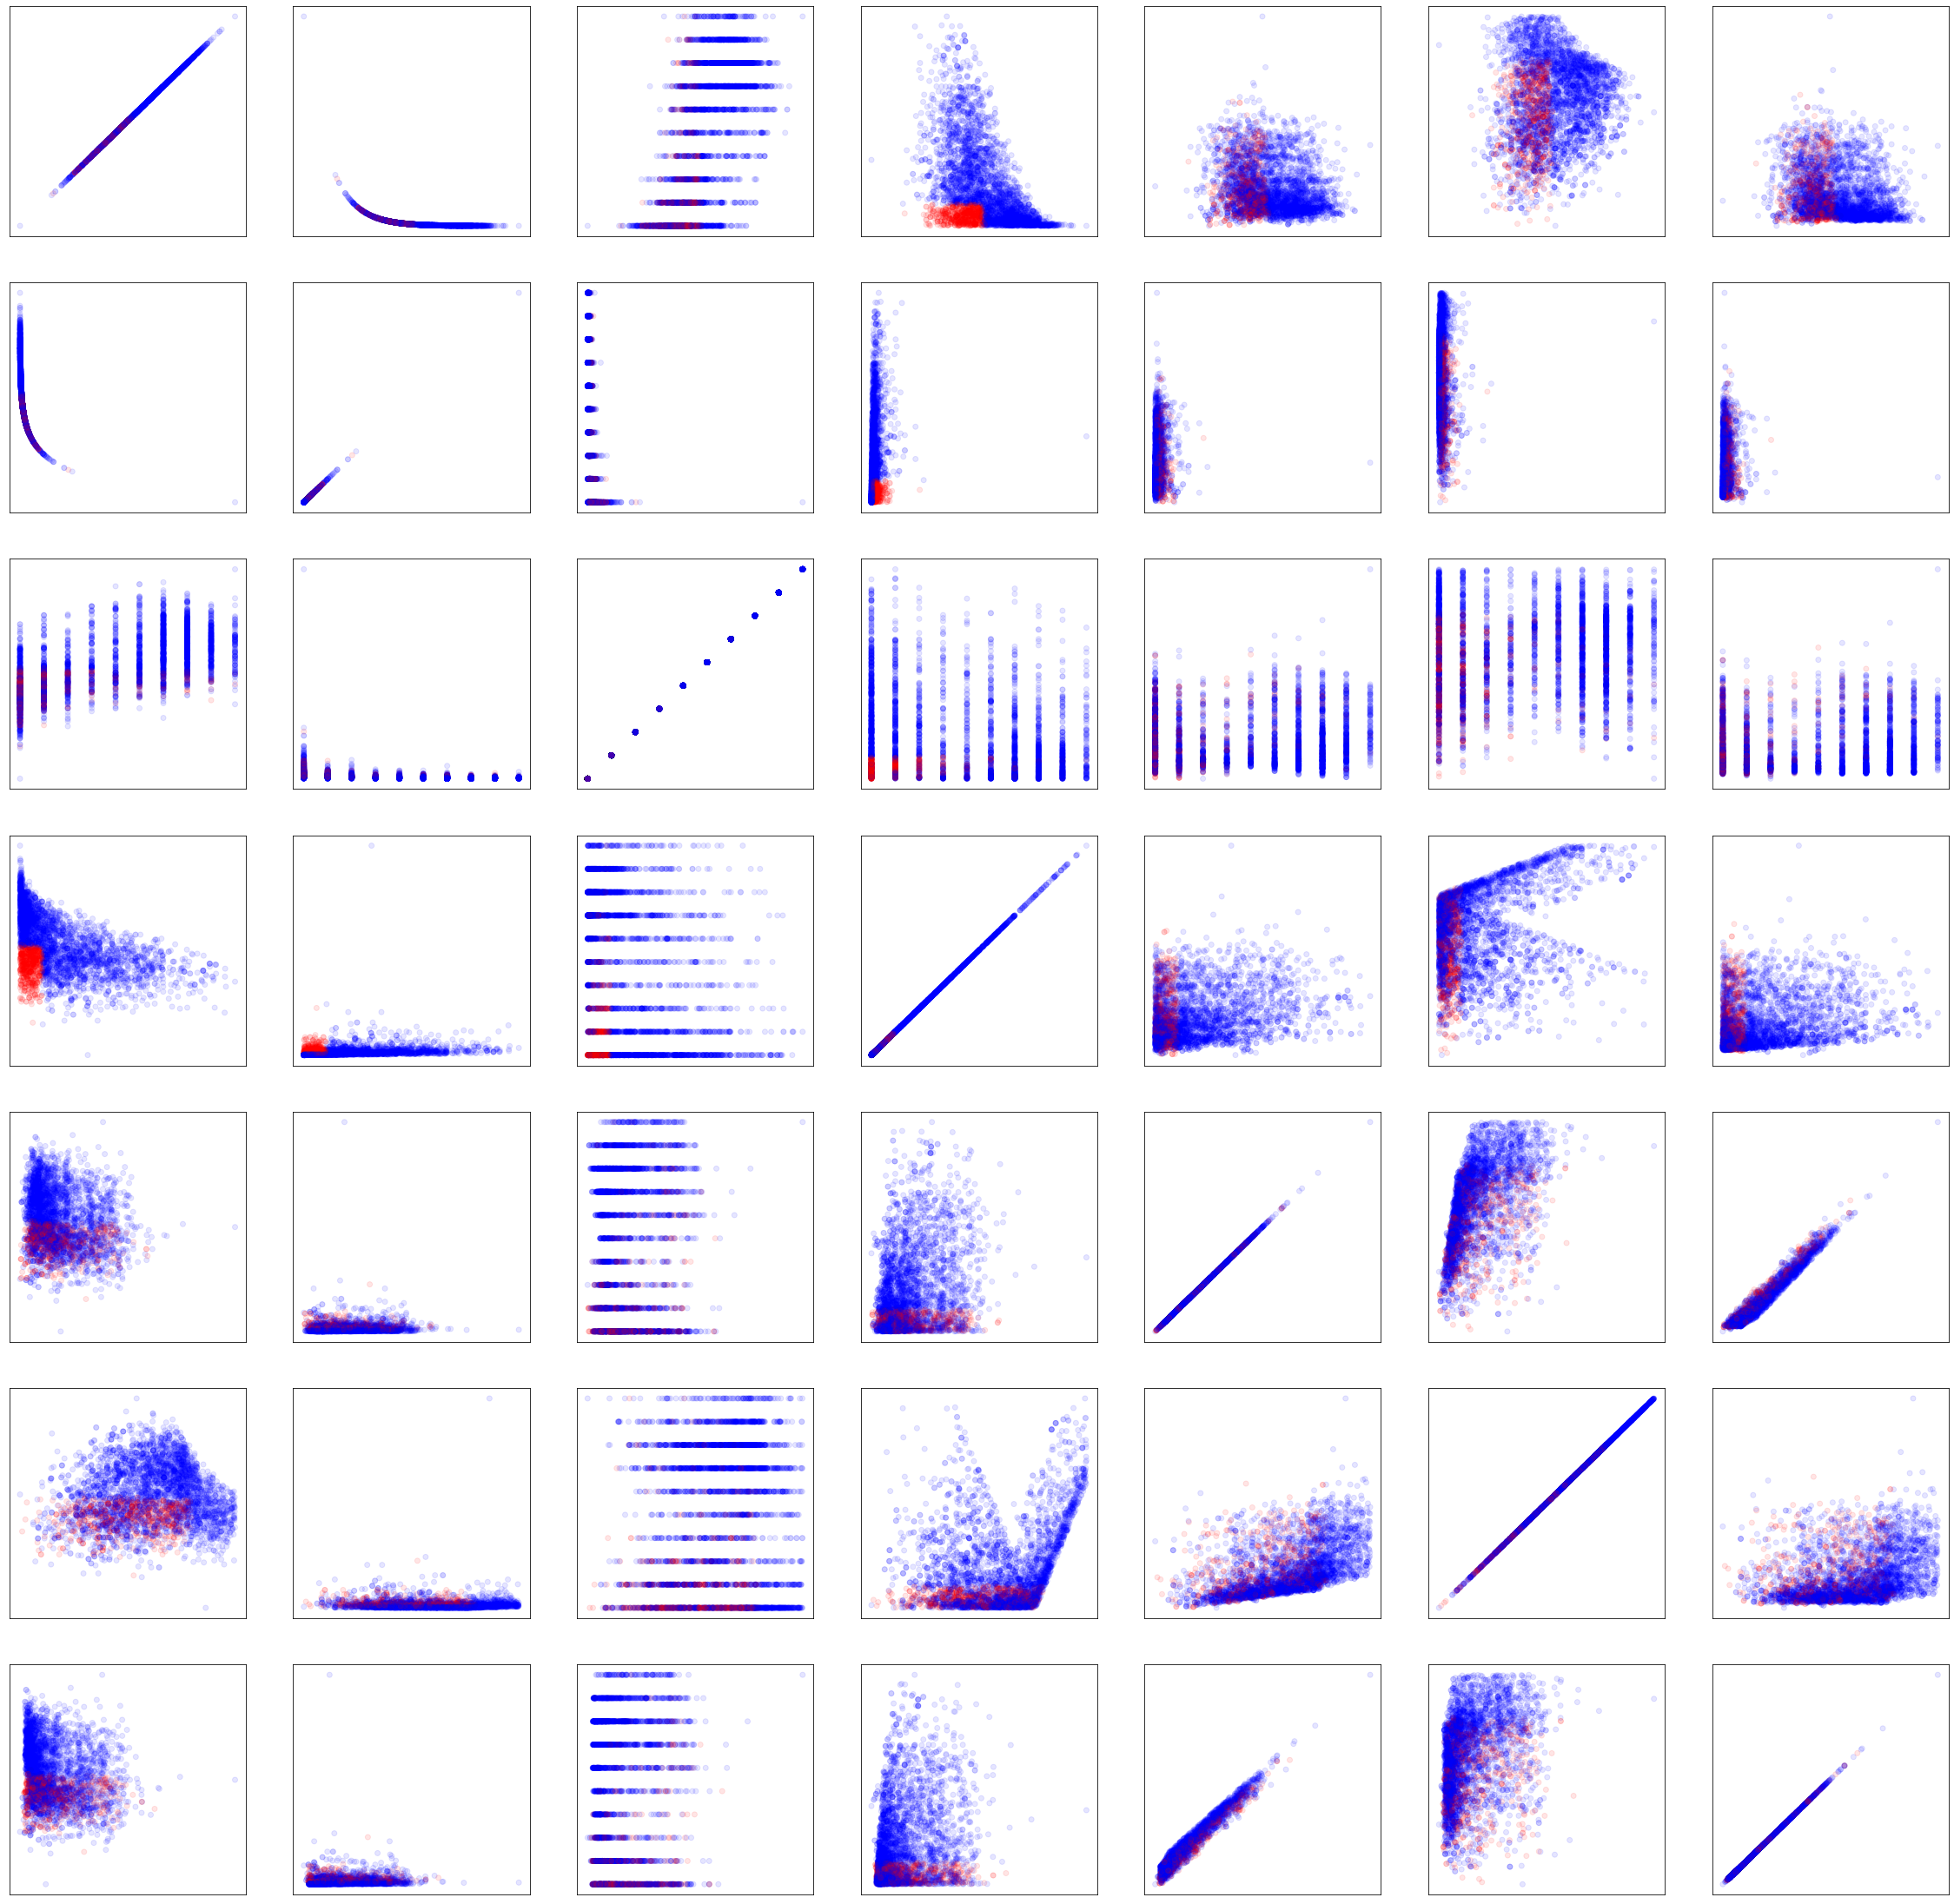

In [29]:
fig = plt.figure(figsize=(40,40))

k = 1

ycolors = ['r' if value > 0 else 'b' for value in y]

for i in range(X_final.shape[1]):
    for j in range(X_final.shape[1]):
        fig.add_subplot(X_final.shape[1],X_final.shape[1], k)
        plt.scatter(X_final[:,i],X_final[:,j],color=ycolors, marker='o', alpha=0.1)
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        k = k + 1